In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa import arima_model

from load_dataset import Dataset
import plotting

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
dataset = Dataset('../data/Dataset')

In [4]:
ts = dataset['stl_example.csv']

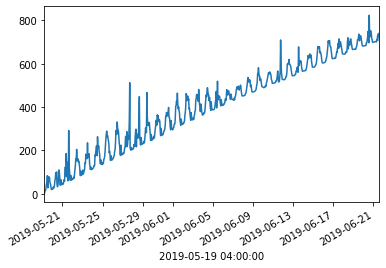

In [5]:
ts.plot()

In [6]:
len(ts)

705

In [7]:
train, test = ts[:650], ts[650:]

In [8]:
model = arima_model.ARIMA(train, order=(6, 2, 2))

/Users/gsinyakov/ts_course/.env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/gsinyakov/ts_course/.env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [9]:
model = model.fit()

In [10]:
preds = model.forecast(30)[0]

In [11]:
ts_pred = pd.Series(preds, index=test[:30].index)

In [12]:
plotting.plot_multiple_ts(train, ts_pred)

In [13]:
from statsmodels.tsa.statespace import sarimax

(3, 2, 2) - (p, d, q). p,q - последние значимые не сезонные пики
(2, 2, 1, 24) - (P, D, Q, s). P, Q - последние  

In [14]:
model = sarimax.SARIMAX(train, odrder=(3, 2, 2), seasonal_order=(2, 2, 1, 24))

/Users/gsinyakov/ts_course/.env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [15]:
model = model.fit()

In [16]:
preds = model.forecast(30)

/Users/gsinyakov/ts_course/.env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [17]:
ts_pred = pd.Series(preds.values, index=test[:30].index)

In [18]:
plotting.plot_multiple_ts(train, ts_pred)

Вариант 1.
1. Убрать гетероскедастичность при помощи.
2. Продифференцировать и узнать нужный порядок дифференцирования d.
3. Построить графики acf/pcf и определить параметры p, q, P, Q.
     Если графики acf/pcf похожи на графики для стационарных рядов, значит наше дифференцирование заодно
     убрало сезонность. Тогда необходимо вычесть линейный тренд, чтобы избавиться от тренда и не избавиться при этом
     от сезоннности. И строить acf/pcf уже на этом временном ряде.
4. Обучить модель и попробовать сделать предсказания.
5. Критерий хорошей модели - стационарные остатки.

Вариант 2. (используя критерий Акаике)
1. Выбрать сетку гиперпараметров.
2. Пройтись по сетке, считая aic на тестовой выборке.
3. Выбрать модель с набором гиперпараметров, дающих минимальный aic. 

In [23]:
def calculate_akaike(y_true: np.array, y_pred: np.array, n_params: int):
    L = sum((y_true - y_pred)**2)
    return 2*n_params - 2*np.log(L)

In [24]:
calculate_akaike(test[-30:].values, preds.values, 100)

179.6759817633071